In [1]:
def result(predictions):
    predictions = predictions.tolist()
    result_list=[]
    for pred in predictions:
        result = pred // 0.5 * 0.5
        if (pred - result) > 0.25:
            result += 0.5
        if result < 1.0:
            result = 1.0
        if result > 5.0:
            result = 5.0
        result_list.append(result)
    return result_list

# Accuracy score
def accuracy(Ypred, Ytrue):
    Ytrue = Ytrue.tolist()
    accurate = 0
    for i in range(len(Ytrue)):
        if Ytrue[i] == Ypred[i]:
            accurate += 1
    return accurate / len(Ytrue)

# approximate accurancy rate
def score(pred, test):
    test = test.tolist()
    correct = 0
    for i in range(len(test)):
        p = pred[i]
        t = test[i]
        if p < t+0.5 and p > t-0.5:
            correct += 1
    return correct / len(test)

# First Train on Vocabulary

In [2]:
import pandas as pd
df = pd.read_csv('/Users/zhuxiaoxiao/Desktop/Processed_Data.csv')
df

,full_text,cohesion,syntax,vocabulary,phraseology,grammar,conventions,number_of_words,stopwords_frequency,av_word_per_sen,...,ttr,coherence_score,lexrank_avg_min_diff,lexrank_interquartile,freq_of_noun,freq_of_transition,freq_of_pronoun,noun_to_adj,verb_to_adv,phrase_diversity
0,I think that students would benefit from learn...,3.5,3.5,3.0,3.0,4.0,3.0,261,0.498084,14.500000,...,0.099639,0.422997,0.245068,0.275570,0.203065,0.065134,0.111111,0.377358,0.317073,0.119650
1,When a problem is a change you have to let it ...,2.5,2.5,3.0,2.0,2.0,2.5,533,0.581614,38.071429,...,0.055175,0.506789,0.398650,0.397796,0.200750,0.061914,0.103189,0.373832,0.296875,0.110981
2,"Dear, Principal\n\nIf u change the school poli...",3.0,3.5,3.0,3.0,3.0,2.5,320,0.515625,16.842105,...,0.073317,0.472376,0.699098,0.433225,0.221875,0.043750,0.090625,0.380282,0.277778,0.105634
3,The best time in life is when you become yours...,4.5,4.5,4.5,4.5,4.0,5.0,728,0.559066,20.222222,...,0.055877,0.412691,0.629558,0.498259,0.188187,0.043956,0.119505,0.569343,0.184466,0.105024
4,Small act of kindness can impact in other peop...,2.5,3.0,3.0,3.0,2.5,2.5,234,0.521368,78.000000,...,0.085833,0.551796,0.110281,0.096727,0.230769,0.034188,0.119658,0.481481,0.150000,0.072222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3906,I believe using cellphones in class for educat...,2.5,3.0,3.0,3.5,2.5,2.5,179,0.430168,29.833333,...,0.110204,0.593374,0.062313,0.044963,0.329609,0.072626,0.100559,0.186441,0.315789,0.058876
3907,"Working alone, students do not have to argue w...",4.0,4.0,4.0,4.0,3.5,3.0,465,0.526882,29.062500,...,0.067620,0.325690,0.327018,0.124590,0.273118,0.032258,0.030108,0.370079,0.301887,0.111722
3908,"""A problem is a chance for you to do your best...",2.5,3.0,3.0,3.0,3.5,3.0,257,0.525292,32.125000,...,0.089931,0.383324,0.388689,0.460645,0.214008,0.031128,0.120623,0.454545,0.777778,0.353535
3909,Many people disagree with Albert Schweitzer's ...,4.0,4.5,4.5,4.0,4.5,4.5,510,0.527451,24.285714,...,0.064596,0.444652,0.510104,0.471795,0.223529,0.027451,0.113725,0.526316,0.638889,0.336257


In [3]:
y = df['vocabulary']
X = df.iloc[:, 7:]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [4]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint
from scipy.stats import uniform as sp_randFloat
import warnings
warnings.filterwarnings('ignore')
model = DecisionTreeRegressor()
parameters = {'max_depth':[0,1,2,3,4,5,6,7,8,9,10],
             'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
             'min_samples_split':[0,1,2,3,4,5,6,7,8,9,10]}
randm_src = GridSearchCV(model, parameters)
randm_src.fit(X_train, y_train)
print(randm_src.best_params_)
print(randm_src.best_score_)

{'criterion': 'friedman_mse', 'max_depth': 4, 'min_samples_split': 2}
0.31632139906990203


In [5]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=3, max_depth = 4,criterion='friedman_mse',min_samples_split=2)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

Store the model

In [6]:
import pickle
pickle.dump(dt, open('Decision_Tree_vocab.sav','wb'))

In [13]:
new_pre = result(y_pred)

In [15]:
print(accuracy(new_pre, y_test))
print(score(y_pred, y_test))

0.4061302681992337
0.7049808429118773


# Test feature importance

In [11]:
importance = dt.feature_importances_

In [12]:
importance

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.00851037, 0.        ,
       0.        , 0.        , 0.6259381 , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.29790421, 0.00983244,
       0.01490492, 0.        , 0.00892536, 0.02072785, 0.        ,
       0.        , 0.01325675, 0.        , 0.        , 0.        ])

In [13]:
importance[13]
importance[17]
importance[23]
importance[24]
importance[25]
importance[27]
importance[28]
importance[31]

0.013256747175831961

# Use Our prediction as new feature

In [16]:
y = df['cohesion']
X = df.iloc[:, 7:]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [17]:
y_pred_train = dt.predict(X_train)

In [18]:
new_X_train = X_train
new_X_train['vocabulary_predict'] = y_pred_train
new_X_test = X_test
new_X_test['vocabulary_predict'] = y_pred

In [19]:
warnings.filterwarnings('ignore')
model = DecisionTreeRegressor()
parameters = {'max_depth':[0,1,2,3,4,5,6,7,8,9,10],
             'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
             'min_samples_split':[0,1,2,3,4,5,6,7,8,9,10]}
new_randm_src = GridSearchCV(model, parameters)
new_randm_src.fit(new_X_train, y_train)
print(new_randm_src.best_params_)
print(new_randm_src.best_score_)

{'criterion': 'friedman_mse', 'max_depth': 3, 'min_samples_split': 2}
0.27825569549778617


In [20]:
new_dt = DecisionTreeRegressor(random_state=3, max_depth = 3,criterion='friedman_mse',min_samples_split=2)
new_dt.fit(new_X_train, y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=3, random_state=3)

Store the model

In [21]:
pickle.dump(new_dt, open('Decision_Tree_cohesion.sav','wb'))

In [23]:
new_y_pred = new_dt.predict(new_X_test)

In [24]:
new_pre_lst = result(new_y_pred)

In [25]:
print(accuracy(new_pre_lst, y_test))
print(score(new_y_pred, y_test))

0.3282247765006386
0.5900383141762452


In [26]:
import matplotlib.pyplot as plt
def result_diff_plot(Ytrue,Ypred):
    diff=Ytrue-Ypred
    plt.hist(diff, 30)
    
    plt.xlabel('Difference to Results')
    plt.ylabel('Total Counts')
    plt.title('Distribution of Difference Between Prediction and True Score')
    plt.grid(True)
    plt.show()

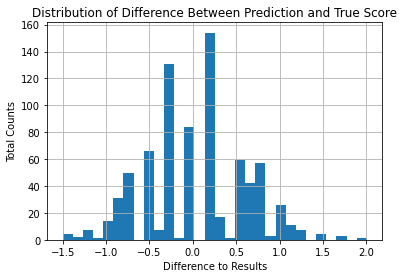

In [27]:
result_diff_plot(new_y_pred, y_test)

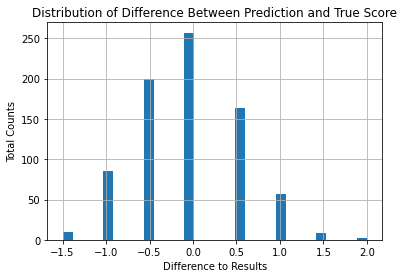

In [28]:
result_diff_plot(new_pre_lst, y_test)

# Old model with less features

In [29]:
new_X = X.iloc[:,7:]

In [30]:
y = df['cohesion']

In [31]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(new_X, y, test_size=0.2, random_state=1)

In [32]:
dt1 = DecisionTreeRegressor(random_state=3, max_depth = 3)
dt1.fit(X_train1, y_train1)
y_pred1 = dt1.predict(X_test1)

In [33]:
new_pre1 = result(y_pred1)

In [34]:
print(accuracy(new_pre1, y_test1))
print(score(y_pred1, y_test1))

0.2950191570881226
0.5810983397190294


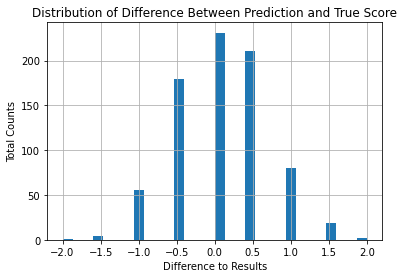

In [35]:
result_diff_plot(new_pre1, y_test1)

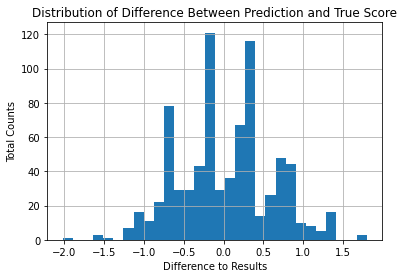

In [36]:
result_diff_plot(y_pred1, y_test1)

# Use rounded Volcabulary as feature

In [37]:
y = df['cohesion']
X = df.iloc[:, 7:]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [38]:
new_pre2 = []
for i in y_pred_train:
    new_pre2.append(round_to_nearest_half_int(i))

In [39]:
X_train2 = X_train
X_train2['vocabulary_predict'] = new_pre2
X_test2 = X_test
X_test2['vocabulary_predict'] = new_pre

In [40]:
warnings.filterwarnings('ignore')
model = DecisionTreeRegressor()
parameters = {'max_depth':[0,1,2,3,4,5,6,7,8,9,10],
             'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
             'min_samples_split':[0,1,2,3,4,5,6,7,8,9,10]}
new_randm_src = GridSearchCV(model, parameters)
new_randm_src.fit(new_X_train, y_train)
print(new_randm_src.best_params_)
print(new_randm_src.best_score_)

{'criterion': 'friedman_mse', 'max_depth': 3, 'min_samples_split': 2}
0.27825569549778617


In [41]:
dt2 = DecisionTreeRegressor(random_state=3, max_depth = 3,criterion='friedman_mse',min_samples_split=2)
dt2.fit(X_train2, y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=3, random_state=3)

In [42]:
y_pred2 = dt2.predict(X_test2)

In [43]:
pre_lst2 = result(y_pred2)

In [44]:
print(accuracy(pre_lst2, y_test))
print(score(y_pred2, y_test))

0.3103448275862069
0.5887611749680716


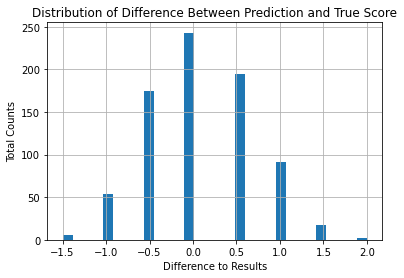

In [45]:
result_diff_plot(pre_lst2, y_test)

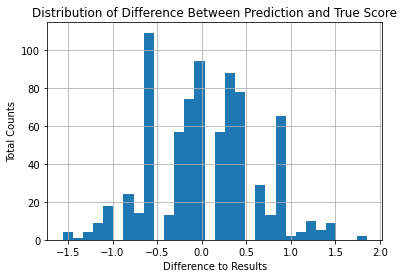

In [46]:
result_diff_plot(y_pred2, y_test)